In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

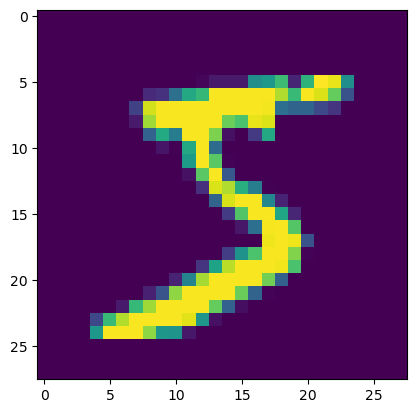

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [14]:
# Each pixels value can be between 0 to 255. Let's do some scaling!
X_train = X_train / 255
X_test = X_test / 255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

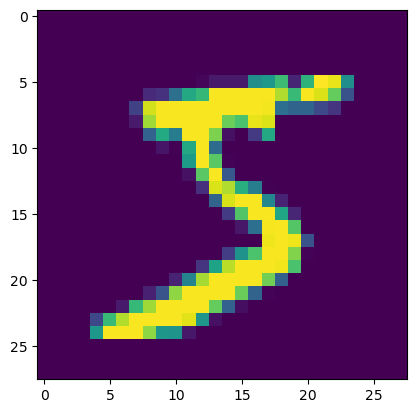

In [15]:
plt.imshow(X_train[0])

In [16]:
# That was our MNIST dataset.
# Let's get to our Neural Network.

In [17]:
model = Sequential()

# A single instance of our data is an 2D image. We need for input: 28 * 28 -> 784
# Hence, we will first add a flatten layer.
model.add(Flatten(input_shape = (28, 28)))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # Multi-class classification

model.summary()

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam')

In [19]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.4781 - val_loss: 0.1861
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1403 - val_loss: 0.1216
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0920 - val_loss: 0.1069
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0679 - val_loss: 0.0908
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0470 - val_loss: 0.0961
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0363 - val_loss: 0.0855
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0285 - val_loss: 0.0889
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0224 - val_loss: 0.0843
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0163 - val_loss: 0.0894
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0149 - val_loss: 0.0992


In [20]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
y_prob

array([[1.5265025e-09, 1.1257614e-09, 1.6189506e-07, ..., 9.9999297e-01,
        7.4609270e-09, 1.1307961e-07],
       [5.4776162e-12, 7.5847781e-09, 1.0000000e+00, ..., 6.7532841e-18,
        1.0233558e-10, 1.8003039e-15],
       [1.2900250e-08, 9.9702924e-01, 2.7485963e-04, ..., 1.7887908e-03,
        8.8487659e-04, 7.0951558e-07],
       ...,
       [2.0185968e-17, 5.2526153e-13, 6.2728221e-16, ..., 7.9738296e-09,
        2.0250861e-10, 6.0477493e-07],
       [2.0181695e-14, 2.8907705e-16, 9.0750110e-15, ..., 5.2002416e-14,
        1.6596271e-09, 8.9722396e-12],
       [6.5430834e-11, 4.0427261e-15, 1.7424294e-12, ..., 3.8167520e-18,
        1.2245989e-16, 2.3623770e-16]], dtype=float32)

In [22]:
y_pred = y_prob.argmax(axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9759

In [25]:
# let's just tweak a little

model2 = Sequential()

model2.add(Flatten(input_shape = (28, 28)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax')) 

model2.summary()

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam')

In [27]:
history = model2.fit(X_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.4843 - val_loss: 0.1415
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.1235 - val_loss: 0.1015
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0774 - val_loss: 0.1048
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0604 - val_loss: 0.0918
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0428 - val_loss: 0.0922
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0322 - val_loss: 0.0972
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0302 - val_loss: 0.1033
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0240 - val_loss: 0.1094
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0183 - val_loss: 0.0964
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0158 - val_loss: 0.1273
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0154 - val_loss: 0.1082
Epoch 12/25
1500/15

In [28]:
y_prob2 = model2.predict(X_test)
y_pred2 = y_prob2.argmax(axis = 1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.9769

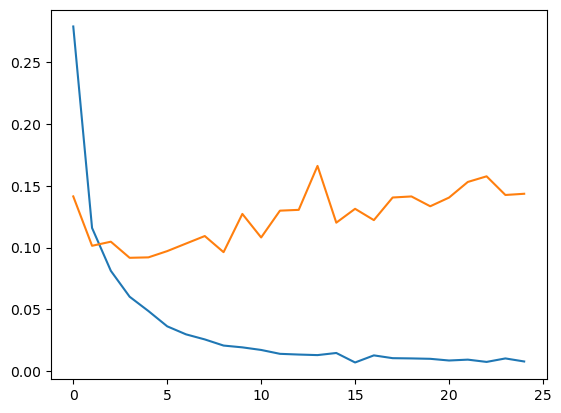

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

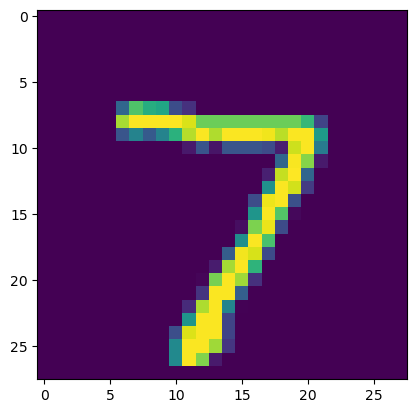

In [30]:
plt.imshow(X_test[0])

In [32]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([7], dtype=int64)